# Milestone 1:

Tenure: how many years the customer has been a client in the bank
Credit Score: the financial reputation (the client is low risk or high risk)

Number Of Products: refers to the number of products the customer has purchased through the bank

Satisfaction Score: a score given by the customer for their complaint resolution

Piont Earned: number of points the customer earned for using credit card

**Exited is the target variable, while the rest are features. Therefore, we may want to explore how each feature relates to the target variable.**

## 1. Data Collection: Cleaning (Sun, Mon) Jana, Malak


1. Load and Inspect the Data:
2. Remove Duplicates
3. Drop Irrelevant Columns
4. Checking for Invalid inputs
5. Standardize Categorical Data & Text Fields
6. Validate Numeric Ranges
7. Final Data Quality Check:
8. Save Cleaned Dataset & Report:

(Correct Data Types), (Handle Missing Values), (Impute Remaining Missing Values)

1) Load and Inspect the Data:

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Customer-Churn-Records.csv",index_col=0)
df.info()

Saving Customer-Churn-Records.csv to Customer-Churn-Records (1).csv
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int

2) Remove Duplicates:

In [ ]:
print(f"Number of duplicates: {df.duplicated().sum()}")
# df= df.drop_duplicates()

Number of duplicates: 0


3) Drop Irrelevant Columns:

In [ ]:
columns_to_drop = ['RowNumber', 'HasCrCard']
df = df.drop(columns=columns_to_drop, errors='ignore')
print(f"Dataset shape after dropping irrelevant columns: {df.shape}")

# Dropped 'RowNumber' since it has no analytical value.
# Dropped 'HasCrCard' to avoid redundancy/conflict with 'PointsEarned',
# which already captures credit card activity more directly.

Dataset shape after dropping irrelevant columns: (10000, 16)


4) Checking for Invalid inputs

In [ ]:
invalid_cases = df[(df['Exited'] == 1) & (df['IsActiveMember'] == 1)]
print(f"Invalid cases (Exited=1 AND IsActiveMember=1): {len(invalid_cases)}")
df.loc[(df['Exited'] == 1) & (df['IsActiveMember'] == 1), 'IsActiveMember'] = 0
invalid_cases = df[(df['Exited'] == 1) & (df['IsActiveMember'] == 1)]
print(f"Invalid cases (Exited=1 AND IsActiveMember=1): {len(invalid_cases)}")

Invalid cases (Exited=1 AND IsActiveMember=1): 735
Invalid cases (Exited=1 AND IsActiveMember=1): 0


5) Standardize Categorical Data & Text Fields:

In [ ]:
#Normalize string values
text_columns = df.select_dtypes(include='object').columns
for i in text_columns:
    df[i] = df[i].str.strip("?") # df["Surname"]= df["Surname"].str.strip("?/_-1234567890.")

# Standardize specific categorical columns
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 'M', 'Female': 'F', 'male': 'M', 'female': 'F'})
if 'Card Type' in df.columns:
    df['Card Type'] = df['Card Type'].str.upper()

df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,F,42,2,0.00,1,0,101348.88,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,F,41,1,83807.86,1,1,112542.58,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,F,42,8,159660.80,3,0,113931.57,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,F,39,1,0.00,2,0,93826.63,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,1,79084.10,0,0,5,GOLD,425
6,15574012,Chu,645,Spain,M,44,8,113755.78,2,0,149756.71,1,1,5,DIAMOND,484
7,15592531,Bartlett,822,France,M,50,7,0.00,2,1,10062.80,0,0,2,SILVER,206
8,15656148,Obinna,376,Germany,F,29,4,115046.74,4,0,119346.88,1,1,2,DIAMOND,282
9,15792365,He,501,France,M,44,4,142051.07,2,1,74940.50,0,0,3,GOLD,251


6) Validate Numeric Ranges:

In [ ]:
# should be non-negative
print(df[['Balance', 'EstimatedSalary', 'Tenure', 'Point Earned']].clip(0))

             Balance  EstimatedSalary  Tenure  Point Earned
RowNumber                                                  
1               0.00        101348.88       2           464
2           83807.86        112542.58       1           456
3          159660.80        113931.57       8           377
4               0.00         93826.63       1           350
5          125510.82         79084.10       2           425
...              ...              ...     ...           ...
9996            0.00         96270.64       5           300
9997        57369.61        101699.77      10           771
9998            0.00         42085.58       7           564
9999        75075.31         92888.52       3           339
10000      130142.79         38190.78       4           911

[10000 rows x 4 columns]


In [ ]:
print("\nBalance Analysis:")
zero_balance = len(df[df['Balance'] == 0])
print(f"Customers with zero balance: {zero_balance} ({(zero_balance/len(df))*100:.2f}%)")


Balance Analysis:
Customers with zero balance: 3617 (36.17%)


6) Final Data Quality Check:

In [ ]:
# Final inspection
print("\nFinal dataset shape:", df.shape)
print("\nFinal data types:\n", df.dtypes )
print("\nFinal missing values:",df.isnull().sum().sum(), "missing values remaining")
df.info()


Final dataset shape: (10000, 16)

Final data types:
 CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

Final missing values: 0 missing values remaining
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4  

## 2. Data Exploration: (Tue, Wen) Steven, Mohab

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
#Data Overview
print("\nData Preview:\n")
df.head(10)


Data Preview:



,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,F,42,2,0.00,1,0,101348.88,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,F,41,1,83807.86,1,1,112542.58,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,F,42,8,159660.80,3,0,113931.57,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,F,39,1,0.00,2,0,93826.63,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,1,79084.10,0,0,5,GOLD,425
6,15574012,Chu,645,Spain,M,44,8,113755.78,2,0,149756.71,1,1,5,DIAMOND,484
7,15592531,Bartlett,822,France,M,50,7,0.00,2,1,10062.80,0,0,2,SILVER,206
8,15656148,Obinna,376,Germany,F,29,4,115046.74,4,0,119346.88,1,1,2,DIAMOND,282
9,15792365,He,501,France,M,44,4,142051.07,2,1,74940.50,0,0,3,GOLD,251


In [ ]:
print("\nData Info:\n")
df.info()


Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
d

In [ ]:
# Descriptive statistics
print("\n Descriptive Stats:\n")
print(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'EstimatedSalary', 'Satisfaction Score', 'Point Earned']].describe().round(2))


 Descriptive Stats:

       CreditScore       Age    Tenure    Balance  NumOfProducts  \
count     10000.00  10000.00  10000.00   10000.00       10000.00   
mean        650.53     38.92      5.01   76485.89           1.53   
std          96.65     10.49      2.89   62397.41           0.58   
min         350.00     18.00      0.00       0.00           1.00   
25%         584.00     32.00      3.00       0.00           1.00   
50%         652.00     37.00      5.00   97198.54           1.00   
75%         718.00     44.00      7.00  127644.24           2.00   
max         850.00     92.00     10.00  250898.09           4.00   

       EstimatedSalary  Satisfaction Score  Point Earned  
count         10000.00            10000.00      10000.00  
mean         100090.24                3.01        606.52  
std           57510.49                1.41        225.92  
min              11.58                1.00        119.00  
25%           51002.11                2.00        410.00  
50%        

In [ ]:
# Check unique values in categorical columns
for i in text_columns:
    print(f"Column '{i}' has {df[i].nunique()} unique values:\n")
    print(df[i].value_counts().head())
    print()

Column 'Surname' has 2932 unique values:

Surname
Smith     32
Scott     29
Martin    29
Walker    28
Brown     26
Name: count, dtype: int64

Column 'Geography' has 3 unique values:

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Column 'Gender' has 2 unique values:

Gender
M    5457
F    4543
Name: count, dtype: int64

Column 'Card Type' has 4 unique values:

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64



### Summary Visualizations

/tmp/ipython-input-495045856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


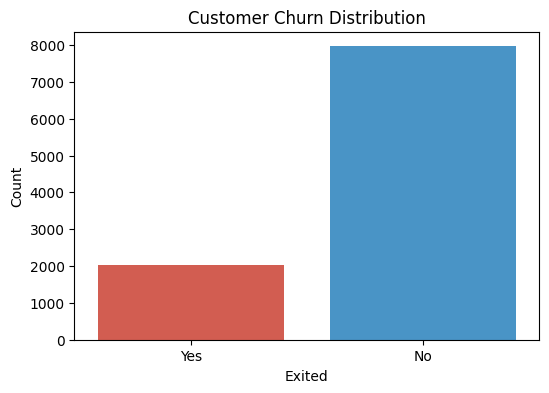

In [ ]:
# 1. Churn count plot (Exited vs Not Exited)
plt.figure(figsize=(6,4))
sns.countplot(
    x=df["Exited"].map({0: "No", 1: "Yes"}),
    palette={"Yes": "#E74C3C", "No": "#3498DB"}
)
plt.title("Customer Churn Distribution")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()


Observation: The bank is not in crisis since far more customers stayed than those who exited.

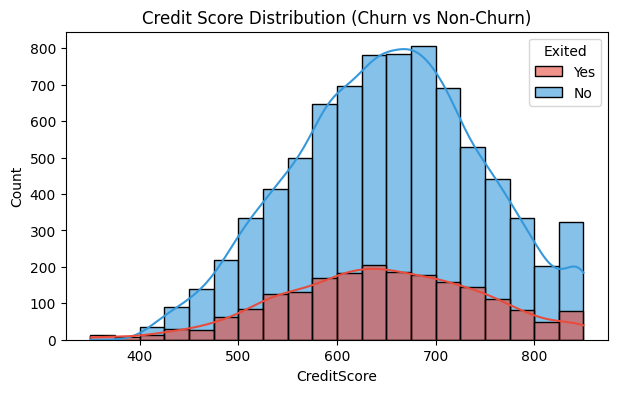

In [ ]:
# 2. Histogram - Credit Score Distribution by Churn
plt.figure(figsize=(7,4))
sns.histplot(
    data=df,
    x="CreditScore",
    hue=df["Exited"].map({0: "No", 1: "Yes"}),
    bins=20,
    kde=True,
    alpha=0.6,
    palette = {"Yes": "#E74C3C", "No": "#3498DB"}
)
plt.title("Credit Score Distribution (Churn vs Non-Churn)")
plt.show()

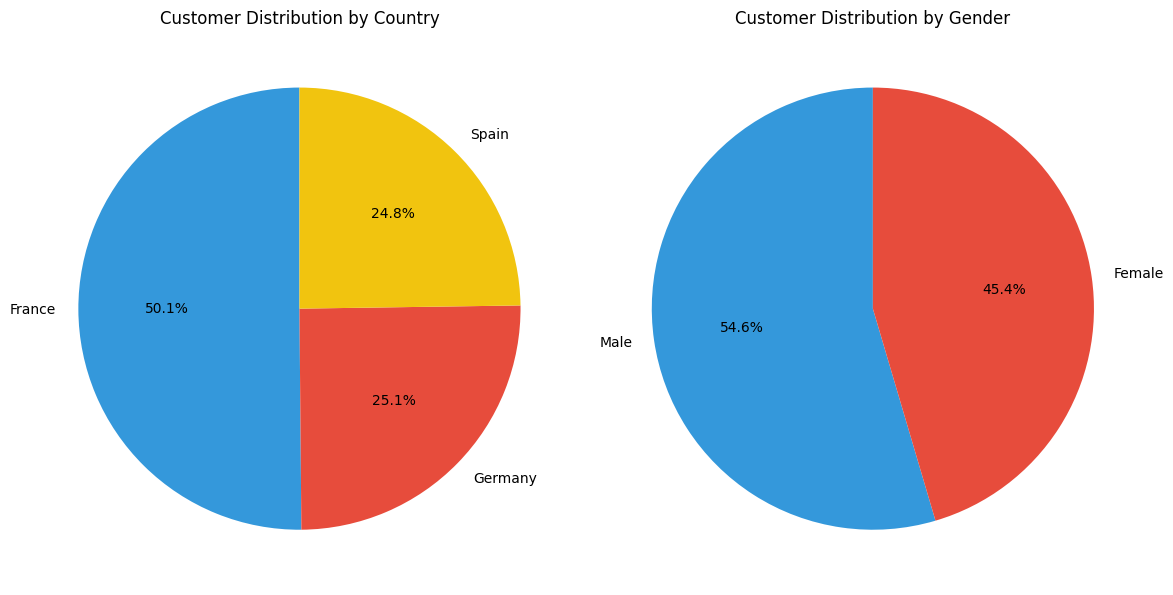

In [ ]:
# Pie charts - Countries & Gender
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Countries
country_counts = df["Geography"].value_counts()
axes[0].pie(
    country_counts,
    labels=country_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#3498DB", "#E74C3C", "#F1C40F"]  # Blue, Red, Gold
)
axes[0].set_title("Customer Distribution by Country")

# Gender
gender_counts = df["Gender"].value_counts()
gender_counts.index = gender_counts.index.map({"M": "Male", "F": "Female"})
axes[1].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#3498DB", "#E74C3C"]
)
axes[1].set_title("Customer Distribution by Gender")

plt.tight_layout()
plt.show()


/tmp/ipython-input-1632204575.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x="Age",bins=20,kde=True,palette="muted",alpha=0.6)


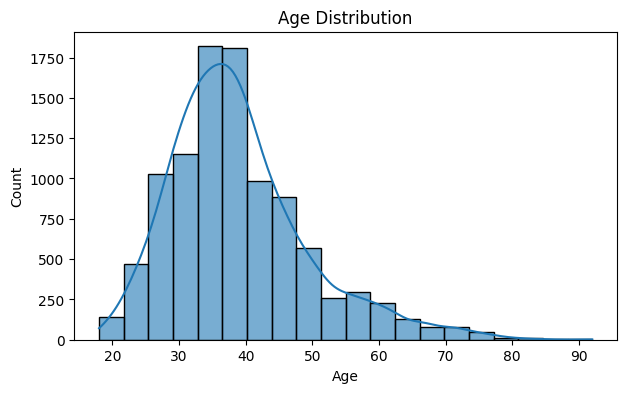

In [ ]:
#Histogram - Age Distribution
plt.figure(figsize=(7,4))
sns.histplot(data=df,x="Age",bins=20,kde=True,palette="muted",alpha=0.6)
plt.title("Age Distribution")
plt.show()

### Relationship Visualizations

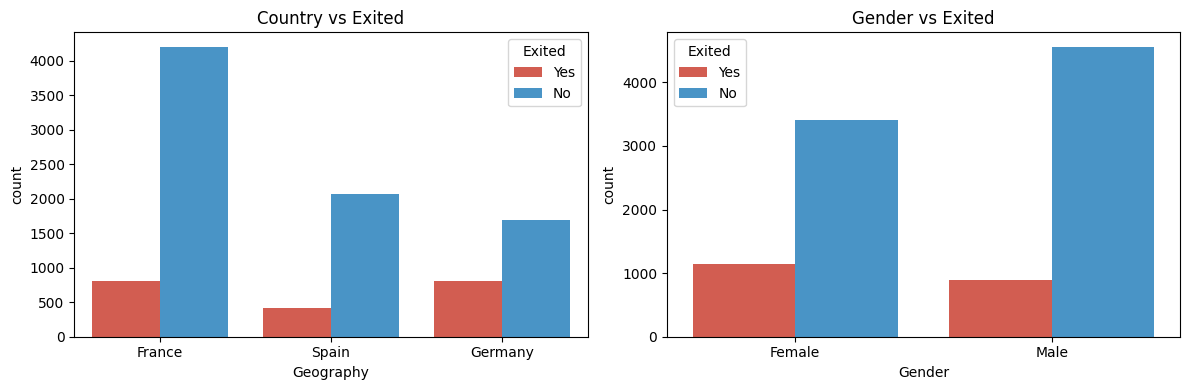

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Country vs Exited
sns.countplot(
    data=df.assign(
        Exited=df["Exited"].map({0: "No", 1: "Yes"})
    ),
    x="Geography",
    hue="Exited",
    palette={"Yes": "#E74C3C", "No": "#3498DB"},
    ax=axes[0]
)
axes[0].set_title("Country vs Exited")

# Gender vs Exited
sns.countplot(
    data=df.assign(
        Gender=df["Gender"].map({"M": "Male", "F": "Female"}),
        Exited=df["Exited"].map({0: "No", 1: "Yes"})
    ),
    x="Gender",
    hue="Exited",
    palette={"Yes": "#E74C3C", "No": "#3498DB"},
    ax=axes[1]
)
axes[1].set_title("Gender vs Exited")

plt.tight_layout()
plt.show()


Observation: Spain shows a lower exit rate, which may be due to better service or simply having the fewest customers, as seen in the summary visualization. Germany's customer share is only about 1% higher than Spain's, yet its exit rate is almost the same as France's, even though France accounts for more than half of the customers.

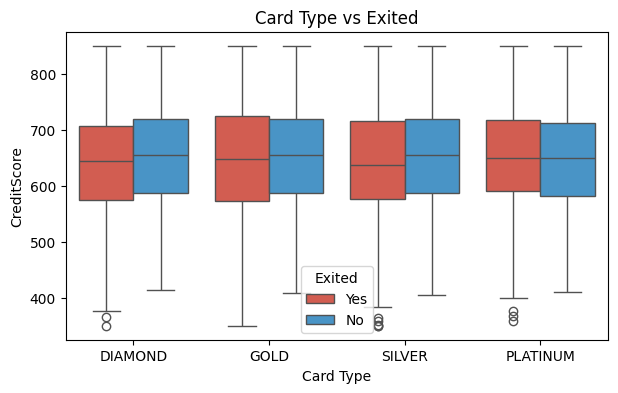

In [ ]:
# Box Plot - Card Type vs Exited
plt.figure(figsize=(7,4))
sns.boxplot(
    data=df.assign(Exited=df["Exited"].map({0: "No", 1: "Yes"})),
    x="Card Type",
    y="CreditScore",
    hue="Exited",
    palette={"Yes": "#E74C3C", "No": "#3498DB"}
)
plt.title("Card Type vs Exited")
plt.show()


Observation: There is no major difference across card types in terms of customer exit rates or credit scores, apart from minor variations and a few outliers.

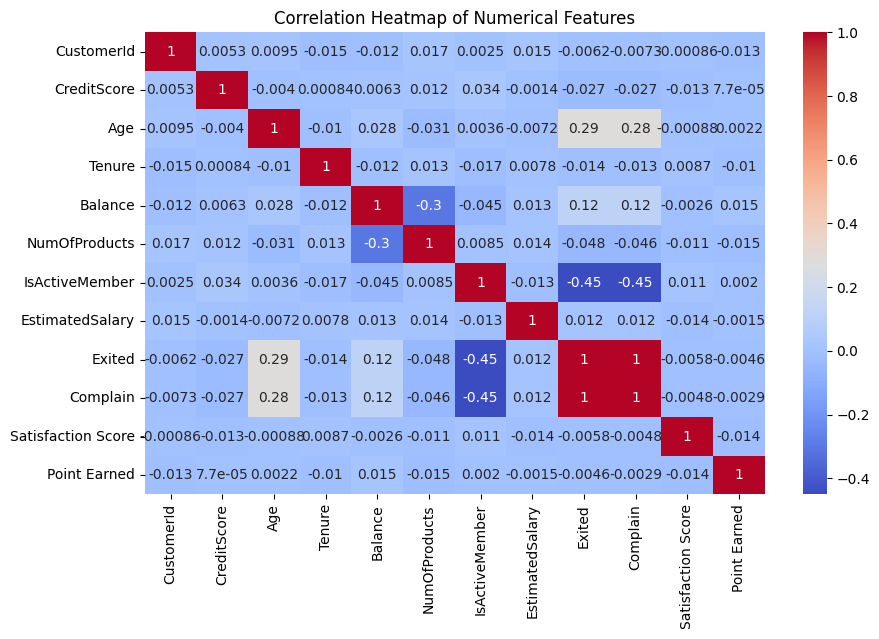

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 3. Data Preprocessing:  

In this section, we will prepare our data for use in a machine learning model in the next milestone. This process may include creating new features from the existing ones, examining relationships between the features and the target variable, and exploring correlations among the features themselves. We will also convert categorical (non-numeric) variables into numeric form to ensure compatibility with machine learning algorithms, such as linear regression, if that model is appropriate for the data.

In [ ]:
# Since the target is binary, we cannot fit a standard regression line to check linearity.
# Instead, we use point-biserial correlation, which measures the linear relationship
# between a binary variable (Exited) and each continuous feature.
from scipy.stats import pointbiserialr

continuous = ['CreditScore', 'Age', 'Tenure', 'Balance',
              'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

for feat in continuous:
    corr, pval = pointbiserialr(df['Exited'], df[feat])
    print(f"{feat}: correlation={corr:.3f}, p-value={pval:.3g}")


CreditScore: correlation=-0.027, p-value=0.00742
Age: correlation=0.285, p-value=1.35e-186
Tenure: correlation=-0.014, p-value=0.172
Balance: correlation=0.119, p-value=1.21e-32
EstimatedSalary: correlation=0.012, p-value=0.212
Satisfaction Score: correlation=-0.006, p-value=0.559
Point Earned: correlation=-0.005, p-value=0.644


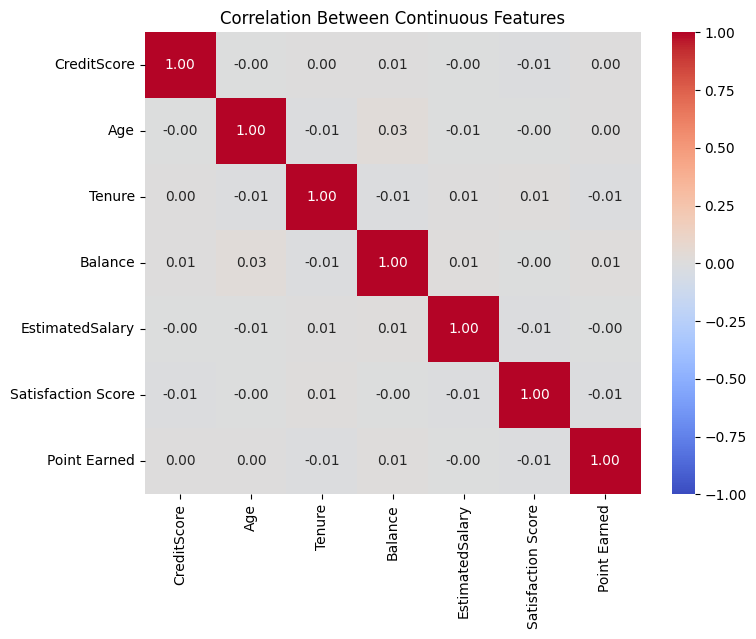

In [ ]:
# Check for linear relationships among continuous features
# (important for detecting multicollinearity, especially if a linear regression model is used)

# Select continuous features only
continuous = ['CreditScore', 'Age', 'Tenure', 'Balance',
              'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[continuous].corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Continuous Features")
plt.show()

In [ ]:
# Transforming Gender and Card Type into Numeric Variables
df["Gender"] = df["Gender"].map({"F": 0, "M": 1})
card_mapping = {
    "SILVER": 1,
    "GOLD": 2,
    "PLATINUM": 3,
    "DIAMOND": 4
}
df["Card Type"] = df["Card Type"].map(card_mapping)
df['Geography'] = df['Geography'].map({'Spain': 0, 'France': 1, 'Germany': 2})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  int64  
 4   Gender              10000 non-null  int64  
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  int64  
 15  Point Earned        10000 non-null  int64  
dtypes: float6

In [ ]:
df.to_csv('cleaned_customer_churn_records.csv', index=False)

# Milestone 2:

## 1. Model Selection:

1) Logistic Regression Model

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('cleaned_customer_churn_records.csv')

In [44]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)

In [45]:
X = df.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']

print(f"Features: {list(X.columns)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned', 'Gender_1', 'Geography_1', 'Geography_2']
X shape: (10000, 14)
y shape: (10000,)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Features scaled for Logistic Regression!")

Training set: (8000, 14)
Test set: (2000, 14)
Features scaled for Logistic Regression!


In [48]:
# Cell 4: Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression trained!")

Logistic Regression trained!


In [49]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_prob_lr)

print("LOGISTIC REGRESSION RESULTS:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"ROC AUC: {lr_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION RESULTS:
Accuracy: 0.9985
ROC AUC: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



2) Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)  # No scaling needed

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest trained!")

Random Forest trained!


In [51]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_prob_rf)

print("RANDOM FOREST RESULTS:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST RESULTS:
Accuracy: 0.9985
ROC AUC: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [52]:
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance_rf)

Random Forest Feature Importance:
               Feature  Importance
7             Complain    0.751623
5       IsActiveMember    0.097450
1                  Age    0.064201
4        NumOfProducts    0.030673
3              Balance    0.012319
13         Geography_2    0.009751
0          CreditScore    0.007709
6      EstimatedSalary    0.006527
10        Point Earned    0.006406
2               Tenure    0.003371
11            Gender_1    0.002887
12         Geography_1    0.002730
8   Satisfaction Score    0.002235
9            Card Type    0.002119


In [53]:
# Cell 9: Train XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost trained!")

XGBoost trained!


In [54]:
# Cell 10: Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_prob_xgb)

print("XGBOOST RESULTS:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"ROC AUC: {xgb_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBOOST RESULTS:
Accuracy: 0.9985
ROC AUC: 0.9986

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [55]:
# Cell 11: XGBoost Feature Importance
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("XGBoost Feature Importance:")
print(feature_importance_xgb)

XGBoost Feature Importance:
               Feature  Importance
7             Complain    0.965248
5       IsActiveMember    0.020799
1                  Age    0.002396
0          CreditScore    0.001966
2               Tenure    0.001342
10        Point Earned    0.001333
6      EstimatedSalary    0.001311
12         Geography_1    0.001172
3              Balance    0.001126
8   Satisfaction Score    0.001022
13         Geography_2    0.000747
9            Card Type    0.000651
11            Gender_1    0.000634
4        NumOfProducts    0.000252


In [56]:
# Cell 12: Compare all models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy],
    'ROC_AUC': [lr_roc_auc, rf_roc_auc, xgb_roc_auc]
})

results = results.sort_values('ROC_AUC', ascending=False)
print("FINAL COMPARISON:")
print(results)

best_model = results.iloc[0]['Model']
best_score = results.iloc[0]['ROC_AUC']
print(f"\n🏆 WINNER: {best_model} with ROC AUC: {best_score:.4f}")

FINAL COMPARISON:
                 Model  Accuracy   ROC_AUC
0  Logistic Regression    0.9985  0.999343
1        Random Forest    0.9985  0.999248
2              XGBoost    0.9985  0.998601

🏆 WINNER: Logistic Regression with ROC AUC: 0.9993


In [61]:
import joblib

# Save the trained logistic regression model
joblib.dump(lr_model, 'lr_model.joblib')

# Save the scaler used for training
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [62]:
sample = [640, 35, 5, 120000, 2, 1, 50000, 0, 3, 1, 500, 1, 0, 1]

In [63]:
import pandas as pd
import joblib

# Load saved model and scaler
lr_model = joblib.load("lr_model.joblib")
scaler = joblib.load("scaler.joblib")

# Create DataFrame from sample input
columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','IsActiveMember',
           'EstimatedSalary','Complain','Satisfaction Score','Card Type','Point Earned',
           'Gender_1','Geography_1','Geography_2']

X = pd.DataFrame([sample], columns=columns)

# Scale features
X_scaled = scaler.transform(X)

# Predict
pred_class = lr_model.predict(X_scaled)
pred_prob = lr_model.predict_proba(X_scaled)[:,1]

print("Prediction (0=stay, 1=exit):", pred_class[0])
print("Probability of exiting:", float(pred_prob[0]))


Prediction (0=stay, 1=exit): 0
Probability of exiting: 2.115984485675004e-06
